In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [3]:
df = sns.load_dataset("iris")

In [4]:
if df.empty == False:
    print("Dataset loaded!")

Dataset loaded!


In [5]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

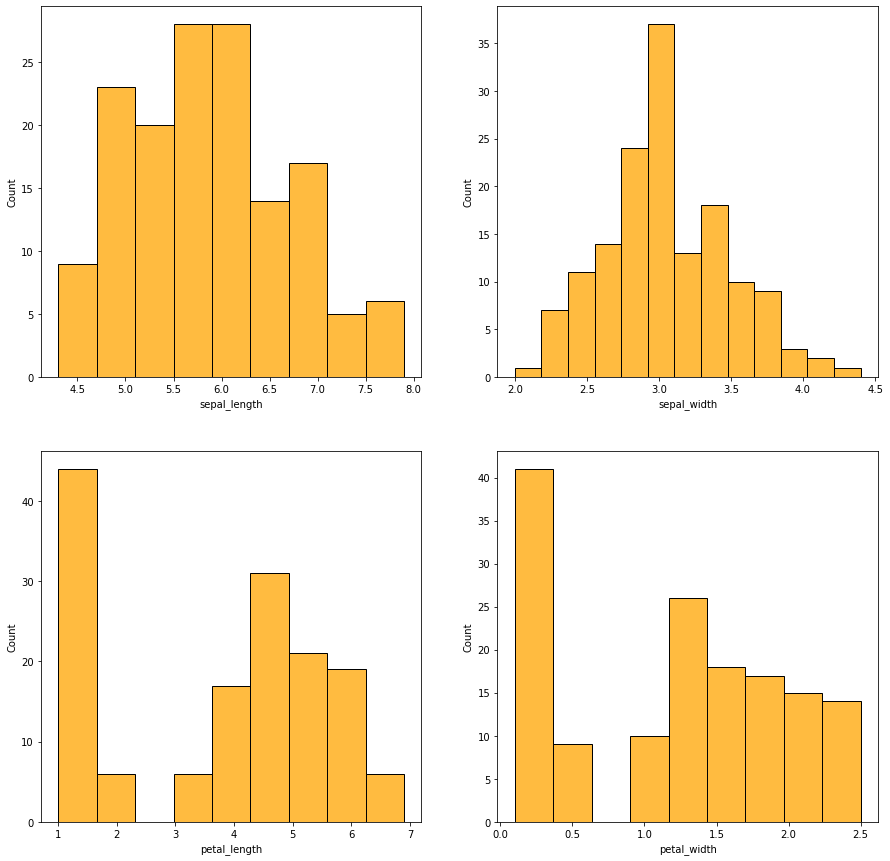

In [26]:
x = 1
plt.figure(figsize=(15,15))
for col in df.columns:
    if df[col].dtypes != 'object':
        plt.subplot(2,2,x)
        sns.histplot(df[col],color="orange")
        plt.show
        x+=1;
        

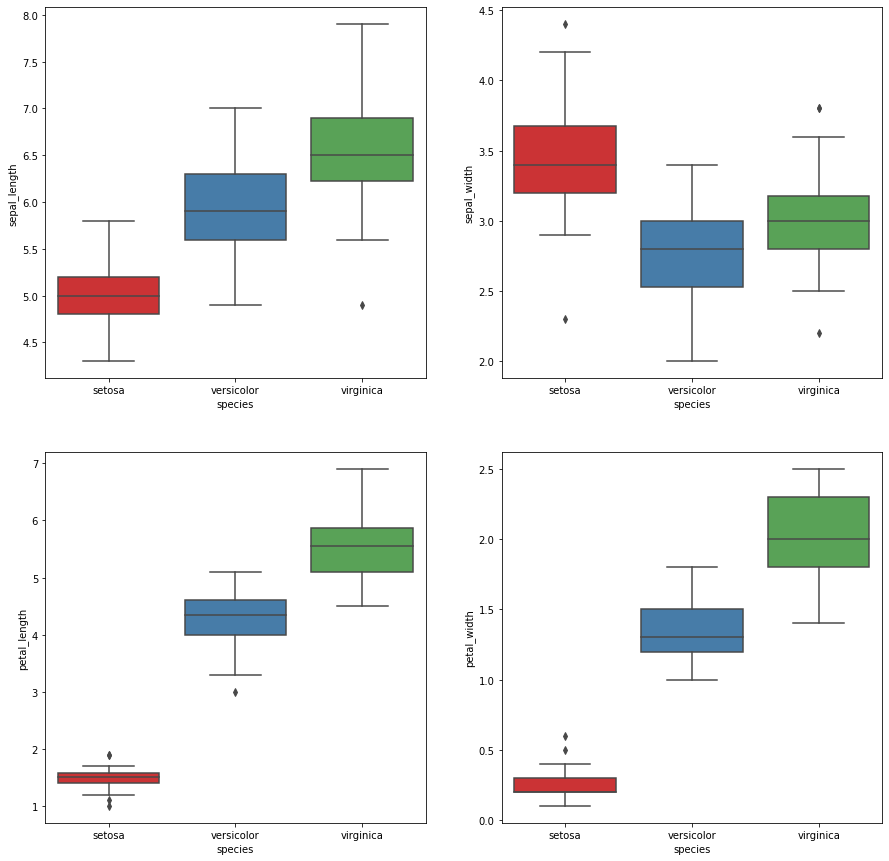

In [25]:
x = 1
plt.figure(figsize=(15,15))
for col in df.columns:
    if df[col].dtypes != 'object':
        plt.subplot(2,2,x)
        sns.boxplot(data=df,x='species',y = col,palette="Set1")
        plt.show
        x+=1;


In [10]:
group_data = df.groupby('species')
group_data.describe()

sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
species                                        
setosa      0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [11]:
setosaData = df.loc[df['species'] == 'setosa']
versicolorData = df.loc[df['species'] == 'versicolor']
virginicaData = df.loc[df['species'] == 'virginica']

In [12]:
def outlierDetection (i,df):
    Q1 = np.percentile(df[i], 25)
    Q3 = np.percentile(df[i], 75)
    IQR = Q3 - Q1
    # Upper bound
    upper = np.where(df[i] >= (Q3+1.5*IQR))
    # Lower bound
    lower = np.where(df[i] <= (Q1-1.5*IQR))

    ''' Removing the Outliers '''
    print('Upper:-')
    print(upper[0])
    print('Upper:-')
    print(lower[0])

In [13]:
print('For Setosa and sepal_width')
outlierDetection('sepal_width', setosaData)

For Setosa and sepal_width
Upper:-
[15]
Upper:-
[41]


In [14]:
print('For versicolor and sepal_width')
outlierDetection('sepal_width', versicolorData)

For versicolor and sepal_width
Upper:-
[]
Upper:-
[]


In [15]:
print('For versicolor and sepal_width')
outlierDetection('sepal_width', virginicaData)

For versicolor and sepal_width
Upper:-
[17 31]
Upper:-
[19]
